https://www.kaggle.com/datasets/ashishraut64/internet-users
https://ourworldindata.org/grapher/gross-domestic-product

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
internet=pd.read_csv('internet.csv')

In [3]:
internet.drop('Unnamed: 0',axis=1,inplace=True)
#because this is an unwanted column when reading csv.

In [4]:
internet.head()

,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  8867 non-null   object 
 1   Code                    8867 non-null   object 
 2   Year                    8867 non-null   int64  
 3   Cellular Subscription   8867 non-null   float64
 4   Internet Users(%)       8867 non-null   float64
 5   No. of Internet Users   8867 non-null   int64  
 6   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 485.0+ KB


In [6]:
world=internet[internet['Entity']=='World']
world.iplot(x='Year',
            y=['Internet Users(%)','Cellular Subscription','Broadband Subscription'],
            xTitle='Year',
            title='Internet usage of the whole population')

In [7]:
import matplotlib.ticker as mtick

In [8]:
gdp=pd.read_csv('gross-domestic-product.csv')

In [9]:
gdp_per_capita=pd.read_csv('gdp-per-capita-worldbank.csv')

In [10]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10457 entries, 0 to 10456
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   10457 non-null  object
 1   Code                     9659 non-null   object
 2   Year                     10457 non-null  int64 
 3   GDP (constant 2015 US$)  10457 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 326.9+ KB


In [11]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               6166 non-null   object 
 1   Code                                                 5732 non-null   object 
 2   Year                                                 6166 non-null   int64  
 3   GDP per capita, PPP (constant 2017 international $)  6166 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.8+ KB


In [12]:
gdp['GDP_growth'] = ((gdp['GDP (constant 2015 US$)'] - gdp['GDP (constant 2015 US$)'].shift(1)) / gdp['GDP (constant 2015 US$)'].shift(1)) * 100

In [13]:
gdp_per_capita.rename(columns={'GDP per capita, PPP (constant 2017 international $)':'GDP per capita'},inplace=True)

In [14]:
internet2010=internet[internet['Year']>=2010]
gdp2010=gdp[gdp['Year']>=2010]
gdppc2010=gdp_per_capita[gdp_per_capita['Year']>=2010]

In [15]:
internet2010['Year'] = pd.to_numeric(internet2010['Year'], errors='coerce').astype('Int64')
gdp2010['Year'] = pd.to_numeric(gdp2010['Year'], errors='coerce').astype('Int64')
gdppc2010['Year'] = pd.to_numeric(gdppc2010['Year'], errors='coerce').astype('Int64')

internet2010 = internet2010.dropna(subset=['Year'])
gdp2010= gdp2010.dropna(subset=['Year'])
gdppc2010= gdppc2010.dropna(subset=['Year'])

#have to add some extra codes to adjust the dataframe when combining datasets. 

In [16]:
result=pd.merge(internet2010,gdp2010,on=['Entity','Code','Year'],how='outer',suffixes=('','_drop'))
result=pd.merge(result,gdppc2010,on=['Entity','Code','Year'],how='outer',suffixes=('','_drop'))
result=result.loc[:,~result.columns.str.endswith('_drop')]
result.head()

,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,GDP (constant 2015 US$),GDP_growth,GDP per capita
0,Afghanistan,AFG,2010,35.003128,4.000000,1127587.0,0.005140,1.535460e+10,14.362441,1957.029053
1,Afghanistan,AFG,2011,45.813625,5.000000,1462458.0,0.000000,1.542007e+10,0.426356,1904.559937
2,Afghanistan,AFG,2012,49.227978,5.454545,1661808.0,0.004814,1.738648e+10,12.752288,2075.491699
3,Afghanistan,AFG,2013,52.083576,5.900000,1860932.0,0.004648,1.836025e+10,5.600747,2116.465332
4,Afghanistan,AFG,2014,55.159515,7.000000,2290135.0,0.004495,1.886049e+10,2.724538,2102.384521


In [17]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2672 entries, 0 to 2671
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   2672 non-null   object 
 1   Code                     2518 non-null   object 
 2   Year                     2672 non-null   Int64  
 3   Cellular Subscription    2410 non-null   float64
 4   Internet Users(%)        2410 non-null   float64
 5   No. of Internet Users    2410 non-null   float64
 6   Broadband Subscription   2410 non-null   float64
 7   GDP (constant 2015 US$)  2410 non-null   float64
 8   GDP_growth               2410 non-null   float64
 9   GDP per capita           2285 non-null   float64
dtypes: Int64(1), float64(7), object(2)
memory usage: 232.2+ KB


<AxesSubplot:>

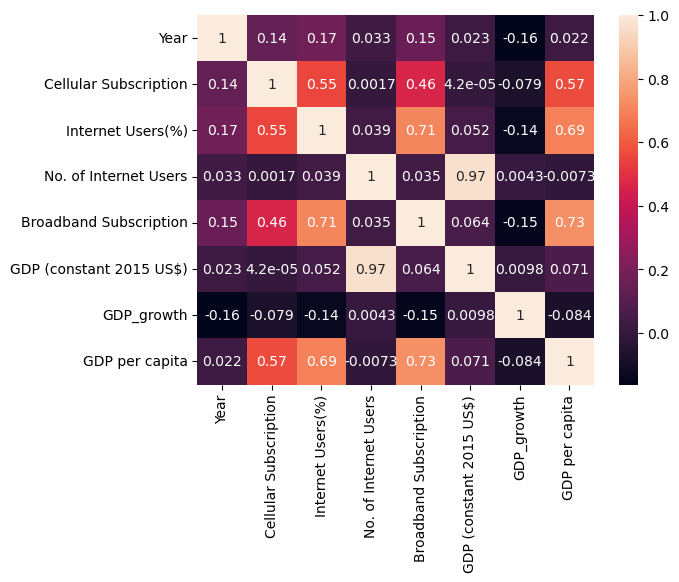

In [18]:
corr=result.corr()
sns.heatmap(corr,annot=True)

In [19]:
only_countries = result.drop(index=result[result['Code'].isin(['Region', 'OWID_WRL'])].index)
year2020_only_countries=only_countries[only_countries['Year']==2020]
year2020_only_countries=year2020_only_countries.sort_values(by=['No. of Internet Users'],ascending=False)
year2020=year2020_only_countries.head(10)
year2020

,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,GDP (constant 2015 US$),GDP_growth,GDP per capita
431,China,CHN,2020,119.390160,70.404778,1.003219e+09,33.595604,1.463184e+13,2.347514,16315.815430
986,India,IND,2020,83.601898,43.000000,6.004464e+08,1.663038,2.500132e+12,-7.251758,6165.746582
2297,United States,USA,2020,106.185554,90.900002,3.053713e+08,36.608768,1.929448e+13,-3.404594,59919.820312
278,Brazil,BRA,2020,96.836349,81.342697,1.734196e+08,17.098593,1.749105e+12,-4.059050,14063.982422
997,Indonesia,IDN,2020,130.014511,53.726494,1.460598e+08,4.285633,1.027603e+12,-2.069546,11444.960938
1802,Russia,RUS,2020,163.589340,84.994667,1.237670e+08,23.225018,1.416124e+12,-2.951271,26456.388672
1074,Japan,JPN,2020,154.222290,90.219460,1.129951e+08,34.789707,4.380757e+12,-4.585511,40232.210938
1397,Mexico,MEX,2020,95.319763,71.968193,9.067870e+07,17.013622,1.148749e+12,-8.309042,17852.359375
629,Egypt,EGY,2020,93.182182,71.914200,7.728269e+07,9.136193,4.122460e+11,3.569672,11951.447266
813,Germany,DEU,2020,128.186859,89.812943,7.484022e+07,43.224636,3.435817e+12,-4.569620,51423.234375


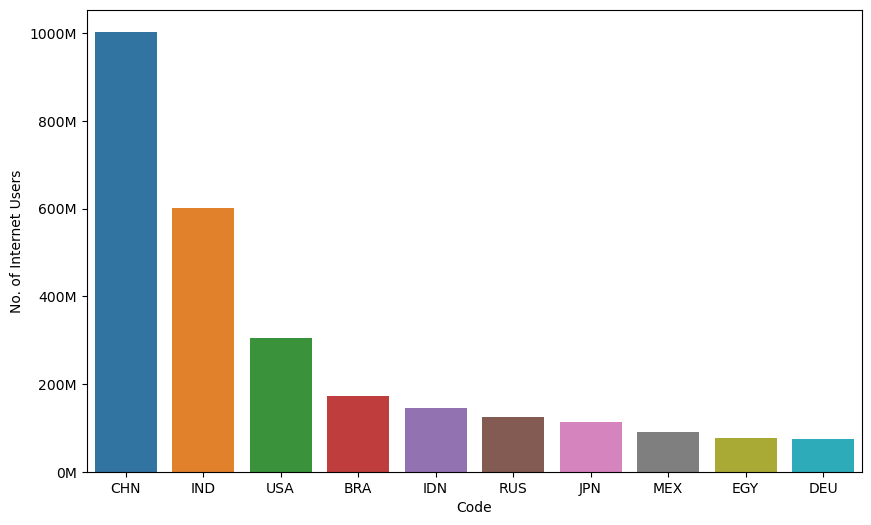

In [20]:
fig,ax=plt.subplots(figsize=(10,6))
y_values_millions = year2020['No. of Internet Users'].astype(float) / 1000000
barplot=sns.barplot(x='Code',y=y_values_millions,data=year2020,ax=ax)
fmt = '{x:.0f}M'
tick = mtick.StrMethodFormatter(fmt)
barplot.yaxis.set_major_formatter(tick)

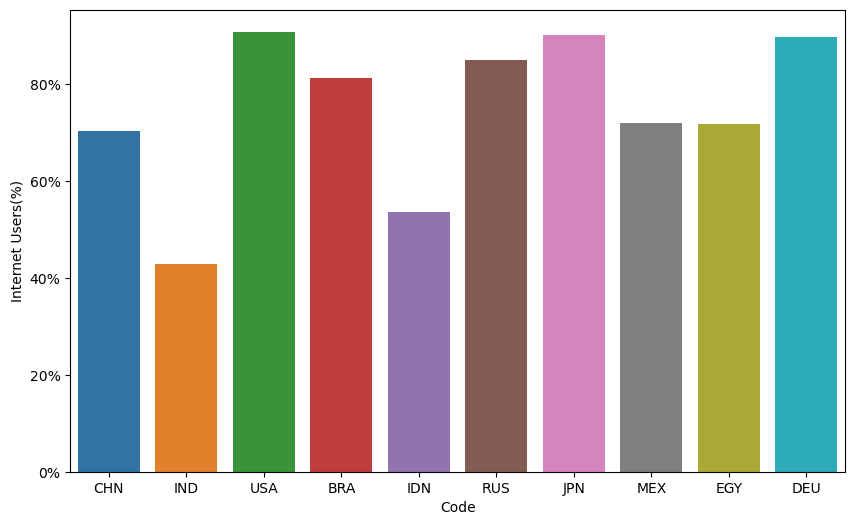

In [21]:
fig,ax=plt.subplots(figsize=(10,6))
barplot=sns.barplot(x='Code',y='Internet Users(%)',data=year2020,ax=ax)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

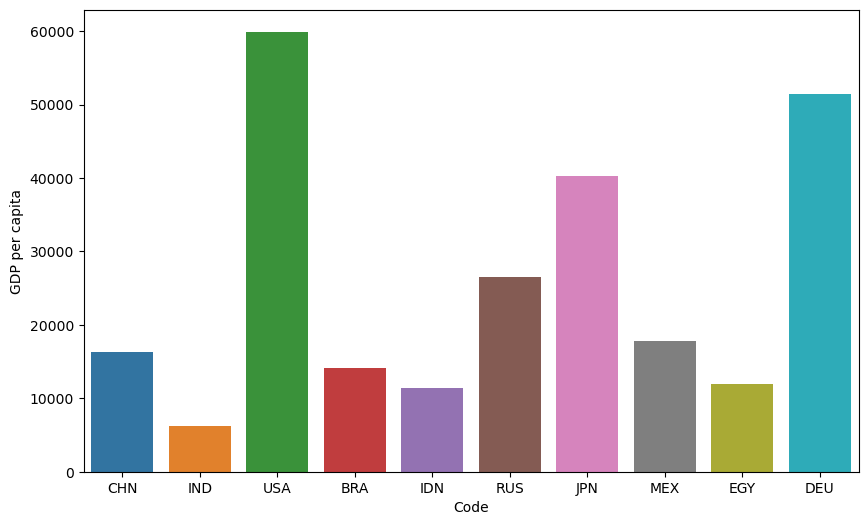

In [22]:
fig,ax=plt.subplots(figsize=(10,6))
barplot=sns.barplot(x='Code',y='GDP per capita',data=year2020,ax=ax)

In [23]:
bin_edges = [0, 50, 80, 100]
bin_labels = ['below 50', 'between 50 and 80', 'above 80']
year2020_only_countries['internet_user_group'] = pd.cut(year2020_only_countries['Internet Users(%)'], bins=bin_edges, labels=bin_labels)
year2020_only_countries.head()

,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,GDP (constant 2015 US$),GDP_growth,GDP per capita,internet_user_group
431,China,CHN,2020,119.390160,70.404778,1.003219e+09,33.595604,1.463184e+13,2.347514,16315.815430,between 50 and 80
986,India,IND,2020,83.601898,43.000000,6.004464e+08,1.663038,2.500132e+12,-7.251758,6165.746582,below 50
2297,United States,USA,2020,106.185554,90.900002,3.053713e+08,36.608768,1.929448e+13,-3.404594,59919.820312,above 80
278,Brazil,BRA,2020,96.836349,81.342697,1.734196e+08,17.098593,1.749105e+12,-4.059050,14063.982422,above 80
997,Indonesia,IDN,2020,130.014511,53.726494,1.460598e+08,4.285633,1.027603e+12,-2.069546,11444.960938,between 50 and 80


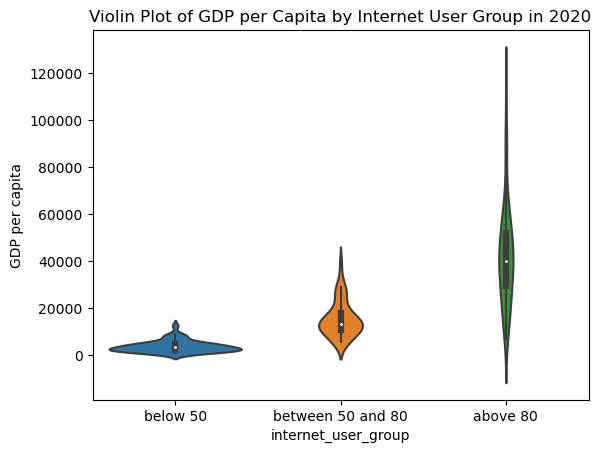

In [24]:
sns.violinplot(x='internet_user_group', y='GDP per capita', data=year2020_only_countries)
plt.title('Violin Plot of GDP per Capita by Internet User Group in 2020')
plt.show()

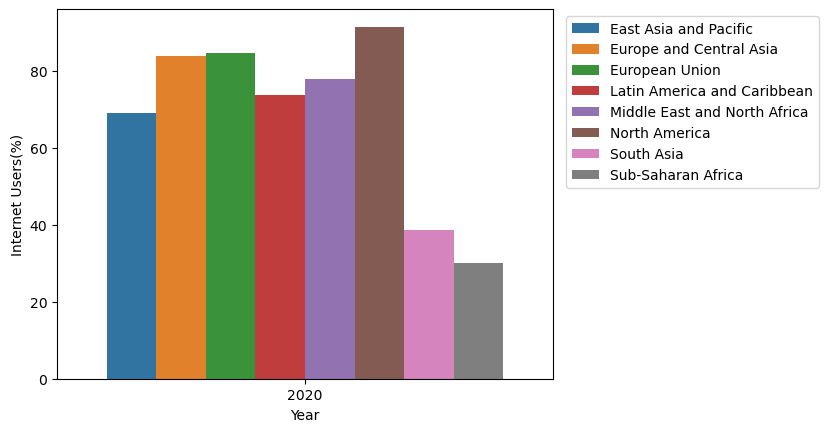

In [25]:
year2020=result[result['Year']==2020]
regions=year2020[year2020['Code']=='Region']
regions = regions[~regions['Entity'].str.contains('income')]

sns.barplot(x='Year',y='Internet Users(%)',data=regions,hue='Entity')
plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1))

In [26]:
import plotly.express as px

In [27]:
fig = px.choropleth(year2020, 
                    locations="Code", 
                    color="Internet Users(%)", 
                    hover_name="Entity",
                    range_color=[0, 100],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Internet User Percent by Country")

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)',
                           lakecolor='rgb(255, 255, 255)',
                           showocean=True,
                           oceancolor='rgb(0,255,255)'),
                  coloraxis_colorbar=dict(
                      title="Internet User Percent",
                      tickvals=[0, 25, 50, 75, 100],
                      ticktext=["0%", "25%", "50%", "75%", "100%"],
                      lenmode="fraction",
                      len=0.7,
                      yanchor="middle",
                      y=0.5,
                      xanchor="left",
                      x=0.1))
fig.show()

In [28]:
fig = go.Figure(data=go.Choropleth(
    locations = year2020['Code'],
    z = year2020['GDP per capita'],
    text = year2020['Entity'],
    colorscale = 'Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP<br>per capita',
))

fig.update_layout(
    title_text='GDP per capita',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

In [29]:
asean=result[(result['Entity']=='Myanmar')|(result['Entity']=='Laos')|
                     (result['Entity']=='Thailand')|(result['Entity']=='Vietnam')|
                     (result['Entity']=='Cambodia')|(result['Entity']=='Malaysia')|
                     (result['Entity']=='Indonesia')|(result['Entity']=='Philippines')|
                     (result['Entity']=='Singapore')|(result['Entity']=='Brunie')|
                      (result['Entity']=='Timor')]

In [30]:
asean

,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,GDP (constant 2015 US$),GDP_growth,GDP per capita
334,Cambodia,KHM,2010,56.949715,1.260000,180981.0,0.249200,1.276792e+10,5.963074,2716.699707
335,Cambodia,KHM,2011,94.605598,3.100000,451791.0,0.151292,1.367056e+10,7.069572,2862.907959
336,Cambodia,KHM,2012,129.259323,4.940000,730461.0,0.201171,1.467034e+10,7.313344,3022.596680
337,Cambodia,KHM,2013,134.860016,6.000000,899981.0,0.217272,1.574958e+10,7.356667,3191.861816
338,Cambodia,KHM,2014,133.896225,14.000000,2129514.0,0.432819,1.687451e+10,7.142572,3364.278076
...,...,...,...,...,...,...,...,...,...,...
2361,Vietnam,VNM,2016,128.790787,53.000000,49357060.0,9.716197,2.052430e+11,6.210818,6767.778809
2362,Vietnam,VNM,2017,126.866127,58.139999,54670814.0,11.913170,2.192246e+11,6.812242,7155.443359
2363,Vietnam,VNM,2018,147.195267,69.847931,66295694.0,13.600209,2.347365e+11,7.075786,7585.943359
2364,Vietnam,VNM,2019,141.226868,68.661583,65761807.0,15.345280,2.512090e+11,7.017440,8041.178223


<AxesSubplot:>

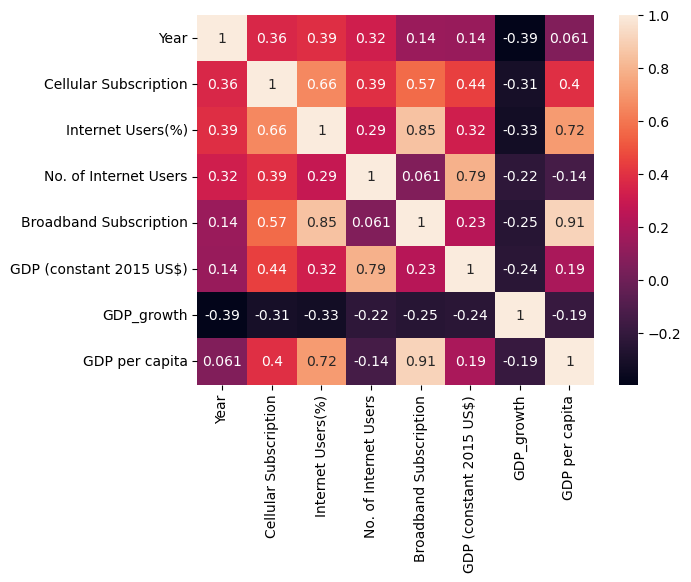

In [31]:
corr=asean.corr()
sns.heatmap(corr,annot=True)

In [32]:
asean.loc[asean['Year']==2020,['Entity','GDP per capita','Internet Users(%)']].sort_values(by='GDP per capita',ascending=False)

,Entity,GDP per capita,Internet Users(%)
1944,Singapore,93397.046875,92.004349
1326,Malaysia,26471.673828,89.555016
2154,Thailand,17284.701172,77.843742
997,Indonesia,11444.960938,53.726494
2365,Vietnam,8200.332031,70.300003
1736,Philippines,7953.581543,49.799999
1152,Laos,7810.734863,33.799999
1505,Myanmar,4857.389648,35.099998
344,Cambodia,4191.566406,0.000000
2165,Timor,3925.948242,29.100000


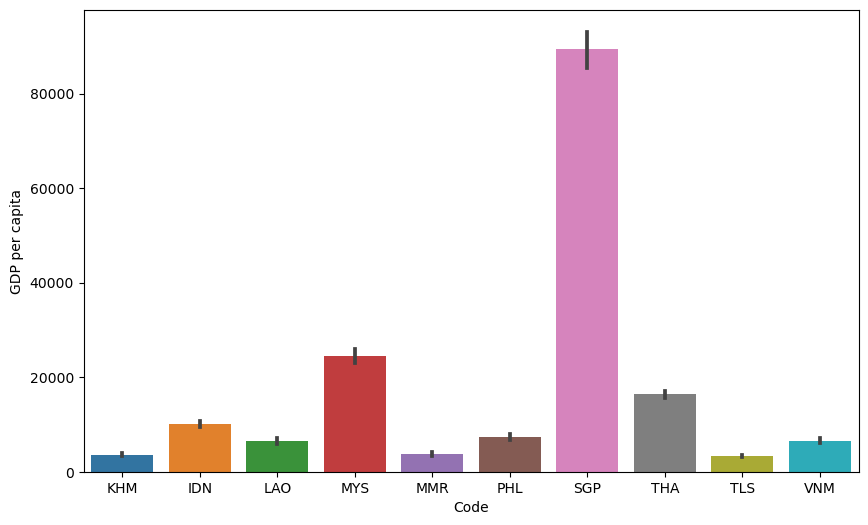

In [33]:
fig,ax=plt.subplots(figsize=(10,6))
barplot=sns.barplot(x='Code',y='GDP per capita',data=asean,ax=ax)

In [34]:
fig = px.line(asean, x='Year', y='GDP per capita', color='Entity')

fig.show()

In [35]:
fig = px.line(asean, x='Year', y='Internet Users(%)', color='Entity')

fig.show()

In [36]:
#pip install plotly==plotly 3.10.0